In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
def detect_and_visualize(image_path, model):
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return

    print(f"Detecting and visualizing objects in {image_path}...")

    results = model(image_path)

    img = cv2.imread(image_path)

    # Process and draw results
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

            class_id = int(box.cls)
            confidence = box.conf.item()

            class_name = model.names[class_id]

            color = (0, 255, 0)
            thickness = 2
            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

            label = f"{class_name}: {confidence:.2f}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.8
            font_thickness = 2
            text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
            text_x = x1
            text_y = y1 - 10

            if text_y < 0:
                text_y = y1 + text_size[1] + 10

            cv2.putText(img, label, (text_x, text_y), font, font_scale, color, font_thickness)

    cv2_imshow(img)

Detecting and visualizing objects in /content/Screenshot (279).png...

image 1/1 /content/Screenshot (279).png: 416x640 6 chairs, 3 tvs, 1 microwave, 266.9ms
Speed: 3.5ms preprocess, 266.9ms inference, 4.5ms postprocess per image at shape (1, 3, 416, 640)


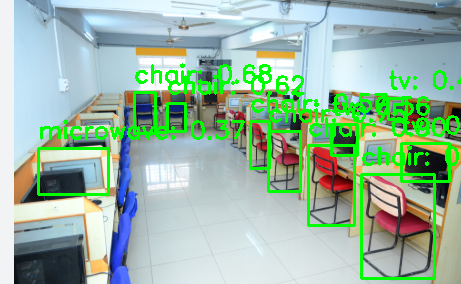

In [6]:
detect_and_visualize('/content/Screenshot (279).png', model)